# 1.4 신경망으로 문제를 풀다
"드디어 준비끝!"<br>
간단한 데이터셋으로 신경망을 학습시켜보자!

## 1.4.1 스파이럴 데이터셋

본 책에서는 데이터셋을 클래스 몇 개를 dataset 디렉터리에 준비해뒀다고 한다. <br>
이번 절에서는 dataset/spiral.py를 이용한다.

github/WegraLee: https://github.com/WegraLee/deep-learning-from-scratch-2/blob/master/dataset/spiral.py

In [1]:
import sys
sys.path.append('..')  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
                       # sys.path.append('..')명령어를 사용하여 부모 디렉터리를 임포트 검색 경로에 추가

from dataset import spiral

x, t = spiral.load_data()
print('x.shape: ', x.shape)  # (300, 2)  # 클래스당 요소(Feature)의 수는 2
print('t.shape: ', t.shape)  # (300, 3)  # 클래스의 수는 3

x.shape:  (300, 2)
t.shape:  (300, 3)


x는 2차원 데이터이고, t는 3차원 데이터이다.

t는 one-hot vector로 정답에 해당하는 클래스에는 1이, 그 외에는 0이 레이블 되어 있다.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(x[:,0], x[:,1], marker='o', linestyle='', ms=12, label=t)
ax.legend()

plt.show()


<Figure size 640x480 with 1 Axes>

In [3]:
# converting one-hot encoding to integer

'''
t = np.argmax(t, axis=1)
t
'''

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], d

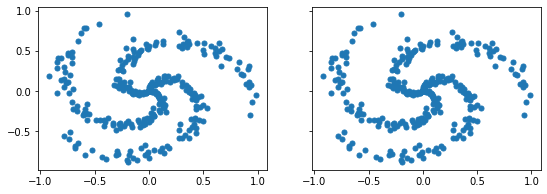

In [6]:
fig, ax = plt.subplots(1, 2, figsize = (9, 3), sharey=True)
ax[0].plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=t)
ax[1].plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=np.argmax(t, axis=1))
plt.show()

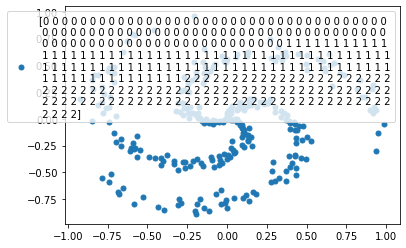

In [11]:
fig, ax = plt.subplots()

ax.plot(x[:,0], x[:,1], marker='o', linestyle='', ms=5, label=np.argmax(t, axis=1))
ax.legend()
plt.show()

In [15]:
print(np.where(t[:, 0]==1))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int64),)


In [17]:
colors = ("red", "green", "blue")
col = dict()
col["red"] = np.where(t[:, 0]==1)
col["green"] = np.where(t[:, 1]==1)
col["blue"] = np.where(t[:, 2]==1)

col

{'red': (array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
         17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
         34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
         51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
         68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
         85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
        dtype=int64),),
 'green': (array([100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112,
         113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125,
         126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138,
         139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151,
         152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164,
         165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177,
         178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 18

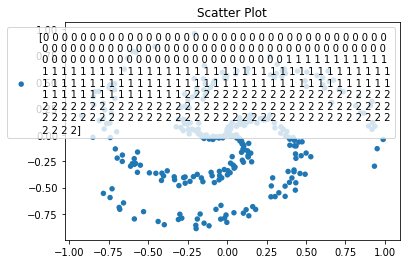

In [19]:
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], edgecolors='none', s=30, label=np.argmax(t, axis=1))
plt.title("Scatter Plot")
plt.legend()
plt.show()

In [ ]:
fig, ax = plt.subplots()
ax.scatter(x[:, 0], x[:, 1], edgecolors='none', s=30, label=np.argmax(t, axis=1))
plt.title("Scatter Plot")
plt.legend()
plt.show()

In [70]:
x[:, 0].shape

(300,)

In [71]:
class_1 = np.where(t[0]==True) 
class_1 = 1
class_1

1

In [72]:
t[:, 0]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [73]:
t[:, 1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [74]:
t.shape[1]

3

In [80]:
label = np.where(t[:, 0]==True)
target = np.ndarray([])
target


array(11.91853033)

In [62]:
for i in range(len(t)):
    class_1 = np.where(t[:, 0]==True)
    class_2 = np.where(t[:, 1]==True)
    class_3 = np.where(t[:, 2]==True)
    
    class_1 = 1
    class_2 = 2
    class_3 = 3
    

In [ ]:
for class_num in range(len(t.shape[1])):
    for num in range(len(t)):
        label = np.where(t[:, class_num]==True)
        t[label]

* 학습에 이용할 스파이럴 데이터셋

In [29]:
import pandas as pd

df = pd.DataFrame(dict(x=x[:, 0], y=x[:, 1], label=t[:]))
groups = df.groupby('label')
df

Exception: Data must be 1-dimensional

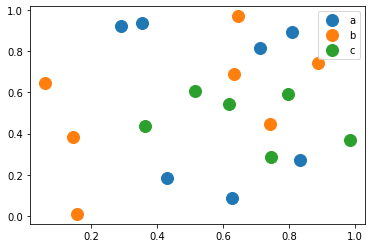

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1974)

# Generate Data
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)  # Optional, just add 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [34]:
print(x.shape)
print(y.shape)
print(labels.shape)

(20,)
(20,)
(20,)


## 1.4.2 신경망 구현

## 1.4.3 학습용 코드

## 1.4.4 Trainer 클래스

## Appendix - matplotlib Scatter plot

reference: https://stackoverflow.com/questions/21654635/scatter-plots-in-pandas-pyplot-how-to-plot-by-category

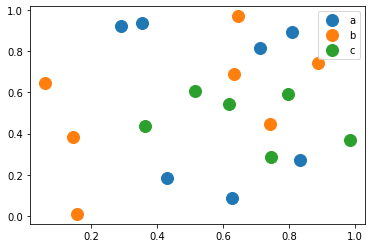

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
np.random.seed(1974)

# Generate Data
num = 20
x, y = np.random.random((2, num))
labels = np.random.choice(['a', 'b', 'c'], num)
df = pd.DataFrame(dict(x=x, y=y, label=labels))

groups = df.groupby('label')

# Plot
fig, ax = plt.subplots()
ax.margins(0.05)  # Optional, just add 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=name)
ax.legend()

plt.show()

In [16]:
df.head()

,x,y,label
0,0.809080,0.893113,a
1,0.361490,0.436031,c
2,0.744783,0.285222,c
3,0.797621,0.592932,c
4,0.617236,0.545665,c
